# Étude de santé publique avec la FAO : la faim dans le monde  

## Préparation et nettoyage des tables

In [94]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Table population

In [95]:
# Lecture de la table
population = pd.read_csv('fr_population.csv', sep=',', header=0)
# Lecture de l'en-tête
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,NaN,Donnée officielle
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,3,Albanie,511,Population totale,2501,Population,2013,2013,1000 personnes,3173,NaN,Donnée officielle
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,4,Algérie,511,Population totale,2501,Population,2013,2013,1000 personnes,39208,NaN,Donnée officielle
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,79,Allemagne,511,Population totale,2501,Population,2013,2013,1000 personnes,82727,NaN,Donnée officielle


###### la clé primaire possible pour cette table est: 'Code zone', zone,'année'

In [96]:
# Exploration des données de "Zone"
population["Zone"].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark',
       'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gam

In [97]:
# Recherche de Chine dans la colonne Zone car doublons possibles
population[population['Zone'].str.contains('Chine')][['Code zone', 'Zone', 'Valeur']]

,Code zone,Zone,Valeur
33,351,Chine,1416667
34,96,Chine - RAS de Hong-Kong,7204
35,128,Chine - RAS de Macao,566
36,41,"Chine, continentale",1385567
37,214,"Chine, Taiwan Province de",23330


######  Eu egard à la "Chine continentale", Il y a redondance de la Chine, elle est comptabilisée deux fois . On supprimera "Chine" pour éviter la redondance mais aussi pour conserver la precision des données géographiques 

In [98]:
# Suppression de Chine car doublons avec Chine continentale
population= population[population['Code zone'] != 351]

#####  Création du dataframe population par pays

In [99]:
# Projection des colonnes du dataframe utiles pour l'étude
population=population[['Code zone', 'Zone', 'Valeur']]
# Multiplication Unité * valeur
population['Valeur'] *=1000
# Renommer la colonne Valeur par Population
pop=population.rename({'Valeur':'humains'}, axis=1)
pop

,Code zone,Zone,humains
0,2,Afghanistan,30552000
1,202,Afrique du Sud,52776000
2,3,Albanie,3173000
3,4,Algérie,39208000
4,79,Allemagne,82727000
...,...,...,...
170,236,Venezuela (République bolivarienne du),30405000
171,237,Viet Nam,91680000
172,249,Yémen,24407000
173,251,Zambie,14539000


###### la clé primaire pour ce dataframe est 'code zone'

### Table sous-alimentation

In [100]:
# Lecture de la table 
sous_alimentation= pd.read_csv('fr_sousalimentation.csv', sep=',', header=0)
# Lecture infos
sous_alimentation.info()
# lecture head
sous_alimentation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            1020 non-null   object 
 1   Domaine                 1020 non-null   object 
 2   Code zone               1020 non-null   int64  
 3   Zone                    1020 non-null   object 
 4   Code Élément            1020 non-null   int64  
 5   Élément                 1020 non-null   object 
 6   Code Produit            1020 non-null   int64  
 7   Produit                 1020 non-null   object 
 8   Code année              1020 non-null   int64  
 9   Année                   1020 non-null   object 
 10  Unité                   1020 non-null   object 
 11  Valeur                  605 non-null    object 
 12  Symbole                 1020 non-null   object 
 13  Description du Symbole  1020 non-null   object 
 14  Note                    0 non-null      

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN


In [101]:
# Exploration des valeurs de 'valeur' car renvoie un Dtype object
sous_alimentation.Valeur.unique()

array(['7.9', '8.8', '9.6', '10.2', '10.6', '2.6', '2.8', '3.2', '3.4',
       '3.5', '0.2', '1.7', '1.6', nan, '8.1', '7.6', '7.4', '1.8', '2',
       '2.3', '1.5', '2.1', '0.1', '26.1', '25.8', '25.3', '24.7', '24.2',
       '<0.1', '1', '1.1', '2.2', '1.9', '0.5', '0.6', '0.4', '0.3',
       '3.6', '3.7', '3.8', '2.7', '2.4', '137.7', '130', '125', '123.1',
       '122.4', '136.6', '129', '124', '122.1', '121.4', '0.9', '0.8',
       '4.1', '3.1', '4.7', '4.6', '3.9', '4', '4.2', '4.4', '0.7', '1.3',
       '23.8', '22.7', '21.9', '21.6', '2.5', '5.2', '5.3', '5.4', '1.2',
       '216.3', '210.4', '202.7', '196.9', '194.4', '22.6', '22.3',
       '22.5', '22', '9.1', '10.7', '11.1', '10', '10.5', '11.8', '13.3',
       '14.6', '8.2', '11.4', '3.3', '1.4', '5', '4.9', '4.8', '7', '7.3',
       '8.3', '6.6', '6.1', '5.8', '5.6', '5.7', '2.9', '13.4', '15.2',
       '17.4', '21.4', '25.6', '12.6', '13.6', '15.1', '16.5', '17.6',
       '38.1', '38.9', '39.3', '39.7', '40', '3', '14', '

In [102]:
# Total nombre de NaN dans la table
sous_alimentation.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                     415
Symbole                      0
Description du Symbole       0
Note                      1020
dtype: int64

In [103]:
# pourcentage des manquants par attribut
prctManquants=sous_alimentation.isna().sum()*100/sous_alimentation.shape[0]
round(prctManquants.sort_values(),2)

Code Domaine                0.00
Domaine                     0.00
Code zone                   0.00
Zone                        0.00
Code Élément                0.00
Élément                     0.00
Code Produit                0.00
Produit                     0.00
Code année                  0.00
Année                       0.00
Unité                       0.00
Symbole                     0.00
Description du Symbole      0.00
Valeur                     40.69
Note                      100.00
dtype: float64

Pour le traitement des manquants 'NaN', Je fais le choix de les ignorer malgré leur 40,7%  car il s'agit des zones non concérnées par la sous-alimentation ou n'ayant pas repondu afin de ne pas affecter la reprsentativité des données. 
En outre, pour l'attribut 'Note'qui compte 100% de NaN et n'apportant aucune plus-value pour l'étude, il ne figurera pas dans le dataframe sous-alimentation.

In [104]:
# recherche du nombre d'occurence de <0.1 dans 'Valeur'
print(sous_alimentation['Valeur'].value_counts())

<0.1     115
0.3       41
0.2       34
0.5       20
0.4       20
        ... 
196.9      1
202.7      1
216.3      1
21.6       1
8.5        1
Name: Valeur, Length: 146, dtype: int64


Je fais le choix de remplacer les <0.1 par des Nan pour les ignorer car selon la population totale cela peut fausser totalement la proportion des personnes sous-alimentés.

In [105]:
# traitement des '<0.1', par un remplacement avec 'NaN' 
sous_alimentation=sous_alimentation.replace('<0.1', None)

In [106]:
# Transformation du type de valeur
sous_alimentation['Valeur']=sous_alimentation.Valeur.astype(float)

In [107]:
# Localisation Chine pour trouver le Code zone 
sous_alimentation[sous_alimentation["Zone"]=="Chine"]
# Suppression de Chine car doublons avec Chine continentale
sous_alimentation=sous_alimentation[sous_alimentation['Code zone'] != 351]
# Multiplication Unité * valeur
sous_alimentation['Valeur'] *=1e6
# Renommer valeur
sous_alimentation=sous_alimentation.rename(columns={'Valeur': 'humSsAlim'})
# restriction à 2012-2014 qui est l'intervalle de 2013
sous_alimentation=sous_alimentation[sous_alimentation["Année"]=="2012-2014"]
# Projection colonnes code zone,zone et valeur
sousAlim=sous_alimentation[["Code zone","Zone","humSsAlim"]]
# Conversion en millions
sousAlim

,Code zone,Zone,humSsAlim
0,2,Afghanistan,7900000.0
5,202,Afrique du Sud,2600000.0
10,3,Albanie,200000.0
15,4,Algérie,1700000.0
20,79,Allemagne,NaN
...,...,...,...
995,236,Venezuela (République bolivarienne du),1900000.0
1000,237,Viet Nam,10400000.0
1005,249,Yémen,7200000.0
1010,251,Zambie,7000000.0


######  Clé primaire 'code Zone '

### Table céréales

In [108]:
# lecture de la table céréales
cereales=pd.read_csv('fr_céréales.csv', sep=',', header=0)
# Création de colonne origine pour la tracabilité 
cereales['origine'] = 'cereale'
# Lecture infos et head céréales
cereales.info()
cereales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            891 non-null    object
 1   Domaine                 891 non-null    object
 2   Code zone               891 non-null    int64 
 3   Zone                    891 non-null    object
 4   Code Élément            891 non-null    int64 
 5   Élément                 891 non-null    object
 6   Code Produit            891 non-null    int64 
 7   Produit                 891 non-null    object
 8   Code année              891 non-null    int64 
 9   Année                   891 non-null    int64 
 10  Unité                   891 non-null    object
 11  Valeur                  891 non-null    int64 
 12  Symbole                 891 non-null    object
 13  Description du Symbole  891 non-null    object
 14  origine                 891 non-null    object
dtypes: int

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169,S,Données standardisées,cereale
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,342,S,Données standardisées,cereale
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2513,Orge,2013,2013,Milliers de tonnes,514,S,Données standardisées,cereale
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2514,Maïs,2013,2013,Milliers de tonnes,312,S,Données standardisées,cereale
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2517,Millet,2013,2013,Milliers de tonnes,13,S,Données standardisées,cereale


###### Code zone, Code Produit, Code Élément est une clé primaire

In [109]:
# Verification si doublons de la Chine comme dans la table population
cereales[cereales["Zone"]=="Chine"]
# Suppression de Chine car doublons avec Chine continentale
cereales=cereales[cereales['Code zone'] != 351]

### Table végétaux

In [110]:
# lecture de la table végétaux
vegetaux=pd.read_csv('fr_vegetaux.csv', sep=',', header=0)
# Création de colonne origine pour la tracabilité 
vegetaux['origine']='vegetale'
# Lecture infos végétaux
vegetaux.info()
# lecture head
vegetaux.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104871 entries, 0 to 104870
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            104871 non-null  object 
 1   Domaine                 104871 non-null  object 
 2   Code zone               104871 non-null  int64  
 3   Zone                    104871 non-null  object 
 4   Code Élément            104871 non-null  int64  
 5   Élément                 104871 non-null  object 
 6   Code Produit            104871 non-null  int64  
 7   Produit                 104871 non-null  object 
 8   Code année              104871 non-null  int64  
 9   Année                   104871 non-null  int64  
 10  Unité                   104871 non-null  object 
 11  Valeur                  104871 non-null  float64
 12  Symbole                 104871 non-null  object 
 13  Description du Symbole  104871 non-null  object 
 14  origine             

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées,vegetale
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées,vegetale
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées,vegetale
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées,vegetale
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées,vegetale


###### Code zone, Code Produit, Code Élément est une clé primaire

In [111]:
# Verification si doublons de la Chine comme dans la table population
vegetaux[vegetaux["Zone"]=="Chine"]
# Suppression de Chine car doublons avec Chine continentale
vegetaux=vegetaux[vegetaux['Code zone'] != 351]

### Table animaux

In [112]:
# Lecture du dataframe animaux
animaux = pd.read_csv('fr_animaux.csv', sep=',', header=0)
# creation d'une colonne origine pour la tracabilité 
animaux['origine']='animale'
# Lecture infos animaux
animaux.info()
# Lecture en-tête animaux
animaux.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37166 entries, 0 to 37165
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            37166 non-null  object 
 1   Domaine                 37166 non-null  object 
 2   Code zone               37166 non-null  int64  
 3   Zone                    37166 non-null  object 
 4   Code Élément            37166 non-null  int64  
 5   Élément                 37166 non-null  object 
 6   Code Produit            37166 non-null  int64  
 7   Produit                 37166 non-null  object 
 8   Code année              37166 non-null  int64  
 9   Année                   37166 non-null  int64  
 10  Unité                   37166 non-null  object 
 11  Valeur                  37166 non-null  float64
 12  Symbole                 37166 non-null  object 
 13  Description du Symbole  37166 non-null  object 
 14  origine                 37166 non-null

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,animale
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,animale
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animale
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animale
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,animale


###### Code zone, Code Produit, Code Élément est une clé primaire

In [113]:
# Localisation de la Chine et trouver Code zone pour supression
animaux[animaux["Zone"]=="Chine"]
# Suppression de Chine car doublons avec Chine continentale
animaux= animaux[animaux['Code zone'] != 351]

### Création d'un dataframe produits

In [114]:
# Lecture infos céréales
cereales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            891 non-null    object
 1   Domaine                 891 non-null    object
 2   Code zone               891 non-null    int64 
 3   Zone                    891 non-null    object
 4   Code Élément            891 non-null    int64 
 5   Élément                 891 non-null    object
 6   Code Produit            891 non-null    int64 
 7   Produit                 891 non-null    object
 8   Code année              891 non-null    int64 
 9   Année                   891 non-null    int64 
 10  Unité                   891 non-null    object
 11  Valeur                  891 non-null    int64 
 12  Symbole                 891 non-null    object
 13  Description du Symbole  891 non-null    object
 14  origine                 891 non-null    object
dtypes: int

In [115]:
# Concatenation des dataframes 'céréales et 'végétaux' pour vérifier si céréales est un sous ensemble de végétaux
verifcereale=pd.concat([cereales,vegetaux],keys=['cereale','vegetale']) 
# Vérification si presence de doublons
verifcereale.duplicated(subset=['Code Domaine','Domaine','Code zone','Zone','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Valeur','Symbole','Description du Symbole']).sum()

891

Il ya 891 lignes en doubles et 891 correspond exactement au nombre de lignes de la table céréales. Eu egard au resultat nous pouvons affirmer que le dataframe céréales est inclus dans vegetaux. Aussi, nous n'utiliserons que 'vegetaux' avec 'animaux' pour le datframe 'produits'

In [116]:
# Concatenation du dataframe vegetaux et animaux car structures identiques
produits=pd.concat([vegetaux,animaux],keys=['vegetale','animale'])
# Vérification si présence de doublons présent dans le nouveau dataframe produits
produits.duplicated().sum()

0

###### Jointure de population avec produits

In [117]:
# Comparaison des colonnes code zone des dataframe pop et produits
pop['Code zone'].isin(produits['Code zone']).value_counts()

True    174
Name: Code zone, dtype: int64

In [118]:
# Jointure interne de population car ils ont les mêmes codes zones pd.merge(produits,pop,)
produits=pd.merge(produits, pop[['Code zone','humains']], on='Code zone', how='inner')
# Lecture head
produits.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine,humains
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées,vegetale,30552000
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées,vegetale,30552000
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées,vegetale,30552000
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées,vegetale,30552000
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées,vegetale,30552000


In [119]:
# verification des correspondances unité et Élément
produits[['Élément', 'Unité']].drop_duplicates()

,Élément,Unité
0,Production,Milliers de tonnes
1,Importations - Quantité,Milliers de tonnes
2,Variation de stock,Milliers de tonnes
3,Disponibilité intérieure,Milliers de tonnes
4,Semences,Milliers de tonnes
5,Pertes,Milliers de tonnes
6,Nourriture,Milliers de tonnes
7,Disponibilité alimentaire en quantité (kg/pers...,kg
8,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour
9,Disponibilité de protéines en quantité (g/pers...,g/personne/jour


In [120]:
# Mise en perspective des élements avec produits, code zone, zone,origine,année et humains
dfProduits=produits.pivot_table(index=['Code zone', 'Zone', 'Code Produit', 'Produit', 'Année','origine','humains'],columns=['Élément'],values=['Valeur'],aggfunc=sum)
dfProduits.columns=['Aliments pour animaux','Autres utilisations (non alimentaire)', 'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']
dfProduits=dfProduits.reset_index()
# Renommer les colonnes pour la syntaxe et mettre en adéquation les unités avec les éléments
dfProduits=dfProduits.rename(columns={'Disponibilité intérieure':'dispoInterKtonne','Exportations - Quantité':'exportKtonne','Aliments pour animaux':'alimAnimKtonne','Nourriture':'nourritureKtonne','Disponibilité alimentaire (Kcal/personne/jour)':'dispoAlimKcalPersJr','Disponibilité alimentaire en quantité (kg/personne/an)':'dispoAlimKgPersAn','Importations - Quantité':'importaKtonne','Autres utilisations (non alimentaire)':'autreUtilKtonne','Traitement':'traitementKtonne','Production':'productionKtonne','Disponibilité de matière grasse en quantité (g/personne/jour)': 'dispoMatGrassGrPersJr','Disponibilité de protéines en quantité (g/personne/jour)':'dispoProtGrPersJr','Semences':'semenceKtonne','Variation de stock':'varStockKtonne','Pertes':'perteKtonne'})
dfProduits.head()

,Code zone,Zone,Code Produit,Produit,Année,origine,humains,alimAnimKtonne,autreUtilKtonne,dispoAlimKcalPersJr,...,dispoProtGrPersJr,dispoInterKtonne,exportKtonne,importaKtonne,nourritureKtonne,perteKtonne,productionKtonne,semenceKtonne,traitementKtonne,varStockKtonne
0,1,Arménie,2511,Blé,2013,vegetale,2977000,93.0,0.0,1024.0,...,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0
1,1,Arménie,2513,Orge,2013,vegetale,2977000,137.0,26.0,0.0,...,0.00,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0
2,1,Arménie,2514,Maïs,2013,vegetale,2977000,96.0,NaN,0.0,...,0.01,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN
3,1,Arménie,2515,Seigle,2013,vegetale,2977000,1.0,NaN,1.0,...,0.02,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0
4,1,Arménie,2516,Avoine,2013,vegetale,2977000,4.0,NaN,2.0,...,0.09,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN


###### la clé primaire pour cette table est :code zone, code produit,annee

## Question 1 : Créez un dataframe contenant les informations de population de chaque pays. Calculez le nombre total d’humains sur la planète. Critiquez votre résultat. En cas d’anomalie, analysez et effectuer les corrections nécessaires

In [121]:
# Calcul de la population mondiale 
popMonde=(pop['humains']).sum()
print('Nombre d\'humains sur la planète en 2013 selon les données de la FAO est estimé à:',popMonde,'individus.Cependant, ce chiffre ne reflète que la population totale des pays et régions référencées par la FAO soit 174 alors que le monde   compte entre 197 (selon l\'ONU) et 220 États (en fonction des reconnaissances politiques) et la population mondiale en 2013 etait estimée à un peu plus de 7 mds d\'individus. Source: https://fr.wikipedia.org/wiki/Liste_des_pays_du_monde')

Nombre d'humains sur la planète en 2013 selon les données de la FAO est estimé à: 6997326000 individus.Cependant, ce chiffre ne reflète que la population totale des pays et régions référencées par la FAO soit 174 alors que le monde   compte entre 197 (selon l'ONU) et 220 États (en fonction des reconnaissances politiques) et la population mondiale en 2013 etait estimée à un peu plus de 7 mds d'individus. Source: https://fr.wikipedia.org/wiki/Liste_des_pays_du_monde


## Question 2: Identifiez les redondances dans la liste des 11 quantités données sous forme de formule mathématique puis, l'illustrer avec l'exemple du blé en france

######    Les redondances des 11 quantités données se vérifient par l'équation : 
###### Disponibilité Interieur = production + importation - exportation + variation de stock = nourriture + aliments pour animaux + semences + pertes + traitement + autres utilisations

In [122]:
# Restriction du dataframe à la France et au blé
filtre=(produits['Code zone']==68)&(produits['Produit']=='Blé')
bleFrance=produits[filtre]
# Mise en perspective de "Élément"
bleFrance=pd.pivot_table(bleFrance, values='Valeur', index=['Produit'],columns=['Élément']).reset_index()
bleFrance

Élément,Produit,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Blé,7822.0,2824.0,811.0,108.43,4.2,25.99,20298.0,21502.0,2055.0,6971.0,358.0,38614.0,748.0,1575.0,1131.0


In [123]:
# Vérification de l'équation
a=bleFrance['Disponibilité intérieure']
a
b=bleFrance['Production']+bleFrance['Importations - Quantité']-bleFrance['Exportations - Quantité']+bleFrance['Variation de stock']
b
c=bleFrance['Nourriture']+bleFrance['Aliments pour animaux']+bleFrance['Semences']+bleFrance['Pertes']+bleFrance['Traitement']+bleFrance['Autres utilisations (non alimentaire)']
c

0    20298.0
dtype: float64

## Question 3 : Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

In [124]:
# Calcul de la disponibilité alimentaire en Kcal par an
dfProduits['dispoAlimKcal']=(dfProduits['dispoAlimKcalPersJr']*dfProduits['humains']*365)
# Calcul de la disponibilité alimentaire en kg de protéines par an
dfProduits['dispoProtKg']=(dfProduits['dispoProtGrPersJr']/1000*dfProduits['humains']*365)
# Projection du désultat de la disponibilité alimentaire en Kcal et en Kg de protéines par an
dfProduits[['Code zone','Zone', 'Produit', 'dispoAlimKcal', 'dispoProtKg']]
dfProduits

,Code zone,Zone,Code Produit,Produit,Année,origine,humains,alimAnimKtonne,autreUtilKtonne,dispoAlimKcalPersJr,...,exportKtonne,importaKtonne,nourritureKtonne,perteKtonne,productionKtonne,semenceKtonne,traitementKtonne,varStockKtonne,dispoAlimKcal,dispoProtKg
0,1,Arménie,2511,Blé,2013,vegetale,2977000,93.0,0.0,1024.0,...,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,3.316318e+07
1,1,Arménie,2513,Orge,2013,vegetale,2977000,137.0,26.0,0.0,...,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.000000e+00
2,1,Arménie,2514,Maïs,2013,vegetale,2977000,96.0,NaN,0.0,...,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN,0.000000e+00,1.086605e+04
3,1,Arménie,2515,Seigle,2013,vegetale,2977000,1.0,NaN,1.0,...,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.086605e+09,2.173210e+04
4,1,Arménie,2516,Avoine,2013,vegetale,2977000,4.0,NaN,2.0,...,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN,2.173210e+09,9.779445e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,276,Soudan,2763,Poissons Pelagiques,2013,animale,37964000,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000000e+00,0.000000e+00
15601,276,Soudan,2764,"Poissons Marins, Autres",2013,animale,37964000,NaN,0.0,0.0,...,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,0.000000e+00,5.542744e+05
15602,276,Soudan,2805,Riz (Eq Blanchi),2013,vegetale,37964000,NaN,NaN,14.0,...,NaN,33.0,48.0,NaN,17.0,1.0,NaN,0.0,1.939960e+11,3.879921e+06
15603,276,Soudan,2848,Lait - Excl Beurre,2013,animale,37964000,NaN,0.0,315.0,...,0.0,232.0,5892.0,NaN,5660.0,NaN,0.0,NaN,4.364911e+12,2.182455e+08


## Question 4 : à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg.

In [125]:
# Calcul du ratio energie/poids en (Kcal/Kg)
dfProduits['ratioNrjPdsKcalKg']=dfProduits['dispoAlimKcal']/(dfProduits['nourritureKtonne']*1e6)
# Projection du désultat de la disponibilité alimentaire en Kcal et en Kg de protéines par an
dfProduits[['Zone', 'Produit','ratioNrjPdsKcalKg']]

,Zone,Produit,ratioNrjPdsKcalKg
0,Arménie,Blé,2860.368946
1,Arménie,Orge,NaN
2,Arménie,Maïs,NaN
3,Arménie,Seigle,inf
4,Arménie,Avoine,2173.210000
...,...,...,...
15600,Soudan,Poissons Pelagiques,NaN
15601,Soudan,"Poissons Marins, Autres",0.000000
15602,Soudan,Riz (Eq Blanchi),4041.584167
15603,Soudan,Lait - Excl Beurre,740.819908


###### Vérification du calcul en comparant le ratio "énergie/poids" en Kcal/Kg à la valeur calorique d'un oeuf  trouvé sur le web

In [126]:
# Création d'un dataframe de verification et filtrage des produits avec oeufs pour le code produit
oeuf=dfProduits.copy()
oeuf.replace(0,np.nan,inplace=True)
oeuf=oeuf[oeuf['Produit']=='Oeufs']
# Filtrage du dataframe par Code Produit oeufs
oeuf=oeuf[oeuf['Code Produit']==2744]
# Calcul du ratio energie/poids en (Kcal/Kg) 
oeuf['ratioNrjPdsKcalKgOeuf']=oeuf['dispoAlimKcal']/(oeuf['nourritureKtonne']*1e6)
# Suppression des infinites pour ne pas empêcher le calcul de la moyenne
oeuf=oeuf[oeuf['ratioNrjPdsKcalKgOeuf']!=np.inf] 
# Vérification de la moyenne du ratio energie/poids en kcal/kg
oeuf['ratioNrjPdsKcalKgOeuf'].mean()
# Resultat et conversion pour un oeuf de 100g
resultOeuf=oeuf['ratioNrjPdsKcalKgOeuf'].mean()
print('Le ratio energie/poids pour un oeuf selon nos données est de:',resultOeuf/10,'Kcal/100g alors que sur le web il   est de : 147 kcal/100g')

Le ratio energie/poids pour un oeuf selon nos données est de: 134.53003859252408 Kcal/100g alors que sur le web il   est de : 147 kcal/100g


###### Le pourcentage de protéines de chaque produit (pour chaque pays) en calculant le ratio "poids de protéines/poids total"

In [127]:
# Calcul du ratio poids proteine/poids total
dfProduits['ratioPdsProtPdsTotal']=dfProduits['dispoProtKg']/(dfProduits['nourritureKtonne']*1e6)
# Projection du désultat de la disponibilité alimentaire en Kcal et en Kg de protéines par an
dfProduits[['Zone', 'Produit','ratioPdsProtPdsTotal']]

,Zone,Produit,ratioPdsProtPdsTotal
0,Arménie,Blé,0.085252
1,Arménie,Orge,NaN
2,Arménie,Maïs,inf
3,Arménie,Seigle,inf
4,Arménie,Avoine,0.097794
...,...,...,...
15600,Soudan,Poissons Pelagiques,NaN
15601,Soudan,"Poissons Marins, Autres",0.110855
15602,Soudan,Riz (Eq Blanchi),0.080832
15603,Soudan,Lait - Excl Beurre,0.037041


###### Vérification du calcul en comparant le ratio poids de protéines/poids total à la teneur en protéines de l'avoine trouvé sur le web

In [128]:
# Creation du dataframe de verification, filtrage des produits avec avoine
avoine=dfProduits.copy()
avoine=avoine[avoine['Produit']=='Avoine']
# Filtrage du dataframe par Code Produit avoine
avoine=avoine[avoine['Code Produit']==2516]
# Calcul du ratio
avoine['ratioPdsProtPdsTotalAvoine']=avoine['dispoProtKg']/(avoine['nourritureKtonne']*1e6)*100
# Suppression des infinites pour ne pas empêcher le calcul de la moyenne
avoine=avoine[avoine['ratioPdsProtPdsTotalAvoine']!=np.inf] 
# Moyenne du pourcentage en proteine 
resultAvoine=avoine['ratioPdsProtPdsTotalAvoine'].mean()
# Resultat du ratio pour 100 g d'avoine
print('D\'après notre jeu de données pour 100g d\'avoine on a:',resultAvoine,'g de proteines alors que sur le web il est de 10.70 g')

D'après notre jeu de données pour 100g d'avoine on a: 8.17749336154237 g de proteines alors que sur le web il est de 10.70 g


## Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. Étonnamment, il arrive que ce ratio soit différent en fonction du pays. Il faudra donc réaliser pour chaque aliment une moyenne sur les différents pays. Vous créerez donc une nouvelle table grâce à une agrégation. Attention à bien retirer les valeurs égales à 0 afin de ne pas fausser le calcul de la moyenne. Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [129]:
# Création du dataframe pour distinguer les 5 aliments les plus caloriques
ratioNrjPdsKcalKgPlus=dfProduits[['Produit','ratioNrjPdsKcalKg']]
# Suppression des 0 pour ne pas fausser la moyenne
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus[ratioNrjPdsKcalKgPlus['ratioNrjPdsKcalKg']!=0]
# Suppression des infinites pour ne pas empêcher le calcul
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus[ratioNrjPdsKcalKgPlus['ratioNrjPdsKcalKg']!=np.inf]
# Supressions des NaN pour ne pas empêcher le calcul
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus.dropna(subset =['ratioNrjPdsKcalKg'])
# Calcul de la moyenne pour chaque aliment et aggregation par produit
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus.groupby('Produit').mean()
# Création nouvel index pour faciliter le tri des aliments
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus.reset_index()
# Réstriction par ratio energie/poids et rangement par ordre décroissant
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus.sort_values(by='ratioNrjPdsKcalKg', ascending=False)
# Projection colonnes produit et ratio energie/poids et restriction au 20 premiers resultats
ratioNrjPdsKcalKgPlus=ratioNrjPdsKcalKgPlus[['Produit','ratioNrjPdsKcalKg']].head(5)
ratioNrjPdsKcalKgPlus

,Produit,ratioNrjPdsKcalKg
43,Huiles de Foie de Poisso,9982.932500
41,Huile de Sésame,9433.744729
40,Huile de Son de Riz,9361.549883
44,Huiles de Poissons,9003.715504
32,Huile d'Arachide,8935.765811


###### Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [130]:
# Créationdu dataframe pour distinguer les 5 aliments les plus protéinés
ratioPdsProtPdsTotalPlus=dfProduits[['Produit','ratioPdsProtPdsTotal']]
# Suppression des 0 pour ne pas fausser la moyenne
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus[ratioPdsProtPdsTotalPlus['ratioPdsProtPdsTotal']!=0]
# Suppression des infinites pour ne pas empêcher le calcul
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus[ratioPdsProtPdsTotalPlus['ratioPdsProtPdsTotal']!=np.inf]
# calcul de la moyenne pour chaque aliment et aggregation par produit
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus.groupby('Produit').mean()
# Création nouvel index pour faciliter le tri des aliments
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus.reset_index()
# Trier ratio pourcentage de protéines par ordre décroissant
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus.sort_values(by='ratioPdsProtPdsTotal', ascending=False)
# Projection colonnes produit et pourcentage de protéines avec restriction au 5 premiers resultats
ratioPdsProtPdsTotalPlus=ratioPdsProtPdsTotalPlus[['Produit','ratioPdsProtPdsTotal']].head(5)
ratioPdsProtPdsTotalPlus

,Produit,ratioPdsProtPdsTotal
27,Graines Colza/Moutarde,0.285365
81,Soja,0.285331
6,Arachides Decortiquees,0.251466
70,Pois,0.223244
50,Légumineuses Autres,0.219716


## Question 6 : Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal

In [146]:
# Création d'un dataframe avec une restriction aux lignes dont nous avons besoins
veget=dfProduits.loc[dfProduits['origine']=='vegetale',]
# Merge avec les clés du cadre de gauche avec le dataframe ratio energie/poids en Kcal
dfDispoIntVegetKcal=pd.merge(veget,ratioNrjPdsKcalKgPlus,how='left',on='ratioNrjPdsKcalKg')
# Suppression des 0 pour ne pas fausser le calcul
dfDispoIntVegetKcal=dfDispoIntVegetKcal[dfDispoIntVegetKcal['ratioNrjPdsKcalKg']!=0]
dfDispoIntVegetKcal=dfDispoIntVegetKcal[dfDispoIntVegetKcal['dispoInterKtonne']!=0]
# Suppression des infinites pour pouvoir faire le calcul
dfDispoIntVegetKcal=dfDispoIntVegetKcal[dfDispoIntVegetKcal['ratioNrjPdsKcalKg']!=np.inf]
dfDispoIntVegetKcal=dfDispoIntVegetKcal[dfDispoIntVegetKcal['dispoInterKtonne']!=np.inf]
# Suppression de Nan pour pouvoir fairele calcul
dfDispoIntVegetKcal=dfDispoIntVegetKcal.dropna(subset=['ratioNrjPdsKcalKg','dispoInterKtonne'])
# Calcul de la disponibilité interieure en Kcal pour chaque produit en convertisant préalablement la disponibilité interieur de Ktonnes à kilos, puis en la multipliant par le ratio energie/poids en Kcal/kg
dfDispoIntVegetKcal['dispoInterProdKcal']=(dfDispoIntVegetKcal['dispoInterKtonne']*1e6)*dfDispoIntVegetKcal['ratioNrjPdsKcalKg']
# Projection des colonnes ratio energie produits kcal kg,disponibilité interieur et disponibilité interieure produits kcal
dfDispoIntVegetKcal=dfDispoIntVegetKcal[['ratioNrjPdsKcalKg','dispoInterKtonne','dispoInterProdKcal']]
# Résultat
dispoIntProdVegetKcalMonde=dfDispoIntVegetKcal.dispoInterProdKcal.sum()
dispoIntProdVegetKcalMonde
# Mise en forme du résultat en millions de Kcal
print('La disponibilité interieure des produits végétaux dans le monde est d\'environ:',dispoIntProdVegetKcalMonde/1e9,'milliards de Kcal')

La disponibilité interieure des produits végétaux dans le monde est d'environ: 12312091.265143275 milliards de Kcal


## Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

###### Calcul du nombre de personne nourrissable en Kcalorie

In [147]:
# Définition du besoin journalier en Kilos/calories et du besoin en gramme/protéines
besoinJr= {'Kcal': 2500, 'Gprot': 55}
# le nombre de personne que l'on peut nourrir est = à la disponibilité mondiale végétale/besoin journalier en Kcal*nombre de jour dans l'année
nbrePersNrsableCal=dispoIntProdVegetKcalMonde/(besoinJr['Kcal']*365)
nbrePersNrsableCal/1e9
nbrePersNrsableCalPourct=nbrePersNrsableCal/popMonde*100
print("le nombre de personnes nourrissables dans le monde en Kcalorie si la disponibilité interieure mondiale de produit végétaux était utilisée pour de la nourriture serait de:",nbrePersNrsableCal/1e9,"Mds d'individus soit",nbrePersNrsableCalPourct.round(),"%")

le nombre de personnes nourrissables dans le monde en Kcalorie si la disponibilité interieure mondiale de produit végétaux était utilisée pour de la nourriture serait de: 13.492702756321398 Mds d'individus soit 193.0 %


###### Calcul du nombre de personne nourrissable en protéines

In [148]:
# Merge avec les clés du cadre de gauche avec le dataframe ratio energie/poids en Kcal
dfDispoIntVegetProt=pd.merge(veget,ratioPdsProtPdsTotalPlus,how='left',on='ratioPdsProtPdsTotal')
# Suppression des 0 pour ne pas fausser le calcul
dfDispoIntVegetProt=dfDispoIntVegetProt[dfDispoIntVegetProt['ratioPdsProtPdsTotal']!=0]
dfDispoIntVegetProt=dfDispoIntVegetProt[dfDispoIntVegetProt['dispoInterKtonne']!=0]
# Suppression des infinites pour pouvoir faire le calcul
dfDispoIntVegetProt=dfDispoIntVegetProt[dfDispoIntVegetProt['ratioPdsProtPdsTotal']!=np.inf]
dfDispoIntVeget=dfDispoIntVegetProt[dfDispoIntVegetProt['dispoInterKtonne']!=np.inf]
# Suppression de Nan pour pouvoir fairele calcul
dfDispoIntVegetProt=dfDispoIntVegetProt.dropna(subset=['ratioPdsProtPdsTotal','dispoInterKtonne'])
# Calcul de la disponibilité interieure en Kcal pour chaque produit en convertisant préalablement la disponibilité interieur de Ktonnes à kilos, puis en la multipliant par le ratio energie/poids en Kcal/kg
dfDispoIntVegetProt['dispoInterProtPdsTotal']=dfDispoIntVegetProt['dispoInterKtonne']*1e6*(dfDispoIntVegetProt['ratioPdsProtPdsTotal'])
# Projection des colonnes ratio energie produits kcal kg,disponibilité interieur et disponibilité interieure produits kcal
dfDispoIntVegetProt=dfDispoIntVegetProt[['ratioPdsProtPdsTotal','dispoInterKtonne','dispoInterProtPdsTotal']]
# Résultat disponibilité mondiale proteines vegetales
dfDispoIntVegetProtMonde=dfDispoIntVegetProt.dispoInterProtPdsTotal.sum()
# Calcul du nombre de personnes nourrissables avec la disponibilité mondiale en proteine vegetale
nbrePersNrssableProtVeget=(dfDispoIntVegetProtMonde*1000)/(besoinJr['Gprot']*365)
nbrePersNrssableProtVeget/1e9
nbrePersNrssableProtVegetPrct=nbrePersNrssableProtVeget/popMonde*100
print("le nombre de personnes nourrissables dans le monde en protéines si la disponibilité interieure mondiale de produits    végétaux était utilisée pour de la nourriture serait de:",nbrePersNrssableProtVeget/1e9,"Mds d'individus soit",nbrePersNrssableProtVegetPrct.round(),"%")

le nombre de personnes nourrissables dans le monde en protéines si la disponibilité interieure mondiale de produits    végétaux était utilisée pour de la nourriture serait de: 14.45466172563563 Mds d'individus soit 207.0 %


## Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [149]:
# Calcul du total disponible
nbrePersNrssablVeget=dfProduits.copy()
nbrePersNrssablVeget['totalDispoAlimKgAn']=(nbrePersNrssablVeget['dispoAlimKgPersAn']*nbrePersNrssablVeget['humains'])+nbrePersNrssablVeget['alimAnimKtonne']*1e6+nbrePersNrssablVeget['perteKtonne']*1e6
# Suppression des 0 pour ne pas fausser la moyenne
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['ratioNrjPdsKcalKg']!=0]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['dispoInterKtonne']!=0]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['ratioPdsProtPdsTotal']!=0]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['perteKtonne']!=0]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['alimAnimKtonne']!=0]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['dispoAlimKgPersAn']!=0]
# Suppression des infinite pour faire la moyenne
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['ratioNrjPdsKcalKg']!=np.inf]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['dispoInterKtonne']!=np.inf]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['ratioPdsProtPdsTotal']!=np.inf]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['perteKtonne']!=np.inf]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['alimAnimKtonne']!=np.inf]
nbrePersNrssablVeget=nbrePersNrssablVeget[nbrePersNrssablVeget['dispoAlimKgPersAn']!=np.inf]
# Suppression de nan
nbrePersNrssablVeget=nbrePersNrssablVeget.dropna(subset=['ratioNrjPdsKcalKg','dispoInterKtonne','ratioPdsProtPdsTotal','perteKtonne','alimAnimKtonne','dispoAlimKgPersAn'])
# Merge avec ratio energie/poids
nbrePersNrssablVeget= pd.merge(nbrePersNrssablVeget,ratioNrjPdsKcalKgPlus,how='left',on='ratioNrjPdsKcalKg')
# Merge avec taux de proteine
nbrePersNrssablVeget= pd.merge(nbrePersNrssablVeget,ratioPdsProtPdsTotalPlus,how='left', on='ratioPdsProtPdsTotal')
# Calcul du total en kcal
nbrePersNrssablVeget['totalKcal']=nbrePersNrssablVeget['totalDispoAlimKgAn']*nbrePersNrssablVeget['ratioNrjPdsKcalKg']
# Calcul du total en protéines
nbrePersNrssablVeget['totalProtKg']=nbrePersNrssablVeget['totalDispoAlimKgAn']*(nbrePersNrssablVeget['ratioPdsProtPdsTotal'])
# On effectue un sum dans les deux nouvelles colonnes
totalKcal =nbrePersNrssablVeget.totalKcal.sum()
totalProtKg =nbrePersNrssablVeget.totalProtKg.sum()
# Calcul du nombre de personne nourrissable en Kcal
nbrePersNrssablVegetKcal=totalKcal/(besoinJr['Kcal']*365)
# Calcul du nombre de personne nourrissable en protéines
nbrePersNrssablVegetprot=(totalProtKg*1e3)/(besoinJr['Gprot']*365)
print("Si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture, on pourrait    satisfaire les besoins caloriques journaliers de: ",nbrePersNrssablVegetKcal/1e9,"Mds d'individus, soit",(nbrePersNrssablVegetKcal/popMonde*100).round(),"% de la population mondiale. En outre, on pourrait satisfaire les besoins protéiques de :",nbrePersNrssablVegetprot/1e9,"Mds d'individus, soit",(nbrePersNrssablVegetprot/popMonde*100).round(),"% de la population mondiale")

Si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture, on pourrait    satisfaire les besoins caloriques journaliers de:  6.878927595529337 Mds d'individus, soit 98.0 % de la population mondiale. En outre, on pourrait satisfaire les besoins protéiques de : 8.633917811082078 Mds d'individus, soit 123.0 % de la population mondiale


## Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [150]:
# Le calcul poids de disponibilité alimentaire = disponibilité alimentaire en quantité (kg/pers/an)* nombre d'humains par pays
dfProduits['dispoAlimKgAn']=(dfProduits['dispoAlimKgPersAn']*dfProduits['humains'])
# Création dataframe pour les besoins de la question
nbreNrssablDispoMonde=dfProduits.copy()
# Merge avec ratio energie/poids
nbreNrssablDispoMonde= pd.merge(nbreNrssablDispoMonde,ratioNrjPdsKcalKgPlus,how='left',on='ratioNrjPdsKcalKg')
# Merge avec taux de proteine
nbreNrssablDispoMonde= pd.merge(nbreNrssablDispoMonde,ratioPdsProtPdsTotalPlus,how='left',on='ratioPdsProtPdsTotal')
nbreNrssablDispoMonde=nbreNrssablDispoMonde[['ratioNrjPdsKcalKg','dispoInterKtonne','ratioPdsProtPdsTotal','dispoAlimKcal','dispoAlimKgAn']]
# Calcul du nombre de personnes pouvant etre nourris avec la disponibilité alimentaire mondiale en Kcal 
totalDispoAlimKcal=nbreNrssablDispoMonde.dispoAlimKcal.sum()
nbreNrssablMondeKcal=totalDispoAlimKcal/(besoinJr['Kcal']*365)
# Resultat
print("le Nombre de personnes nourrissables avec la disponibilité alimentaire mondiale en Kcal est de:",nbreNrssablMondeKcal/1e9,"Mds d'individus soit",(nbreNrssablMondeKcal/popMonde*100).round(),"% de la population mondiale")

le Nombre de personnes nourrissables avec la disponibilité alimentaire mondiale en Kcal est de: 8.0700092276 Mds d'individus soit 115.0 % de la population mondiale


In [151]:
# Calcul du nombre de personnes pouvant etre nourris avec la disponibilité alimentaire mondiale en proteine par Kg
nbreNrssablDispoMonde['dispoAlimProtKg']=nbreNrssablDispoMonde['dispoAlimKgAn']*(nbreNrssablDispoMonde['ratioPdsProtPdsTotal'])
# Suppression des infinite pour faire la moyenne
nbreNrssablDispoMonde=nbreNrssablDispoMonde[nbreNrssablDispoMonde['dispoAlimProtKg']!=np.inf]
# Calcul du nombre de personnes pouvant etre nourri avec la disponibilité alimentaire mondiale en g de proteine 
totalDispoAlimProtKg=nbreNrssablDispoMonde.dispoAlimProtKg.sum()
nbreNrssablMondeProt=(totalDispoAlimProtKg*1000)/(besoinJr['Gprot']*365)
# Resultat
print("le Nombre de personnes nourrissables avec la disponibilité alimentaire mondiale en protéine est de:",nbreNrssablMondeProt/1e9,"Mds d'individus soit",(nbreNrssablMondeProt/popMonde*100).round(),"% de la population mondiale")

le Nombre de personnes nourrissables avec la disponibilité alimentaire mondiale en protéine est de: 10.318862430497823 Mds d'individus soit 147.0 % de la population mondiale


##  Question 10 : A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [152]:
# Création dataframe
dfProduitsSs=sousAlim.copy()
# Jointure externe gauche du dataframe des personnes sous alimentées et des produits
dfProduitsSs= pd.merge(dfProduits,sousAlim,how='left',on='Code zone')
# Suppression des doublons
ProduitsSs=dfProduitsSs[['Code zone','humSsAlim']].drop_duplicates()
# Resultat
resultdfProduitsSs=ProduitsSs.humSsAlim.sum()
print("Le monde compte",resultdfProduitsSs/1e6,"Millions d'individus sous alimenté soit:",resultdfProduitsSs*1e6/popMonde*100/1e6,"% de la population mondiale")

Le monde compte 774.3 Millions d'individus sous alimenté soit: 11.065655651887592 % de la population mondiale


## Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

###### Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO.Repérez dans vos données les informations concernant les céréales (par exemple en créant une colonne de type booléen nommée "is_cereal").

In [153]:
# Exploration des code pour céréales
codeCere=cereales['Code Produit'].unique()
codeCere

array([2511, 2805, 2513, 2514, 2517, 2515, 2516, 2518, 2520])

In [154]:
# Recherche des codes céréales dans le dataframes des produits
rechCere=dfProduits[dfProduits['Code Produit'].isin(codeCere)]
# Projection des colonnes aliments animaux et nourriture et somme
propHumAnim=rechCere[['alimAnimKtonne','nourritureKtonne']].sum()
propHumAnim

alimAnimKtonne       873535.0
nourritureKtonne    1029010.0
dtype: float64

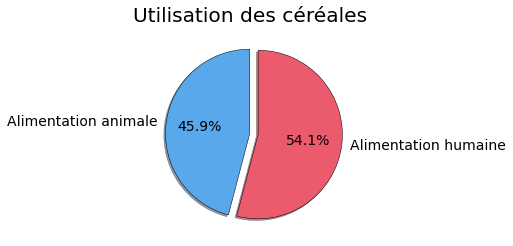

In [155]:
# Visualisation des proportions
plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (7,7))
plt.style.use("fivethirtyeight")

slices = [873535.0, 1029010.0]
labels = ['alimAnimKtonne', 'nourritureKtonne']
explode = [0, 0.1]
cl=['#5AA8EC','#EC5A6E']

plt.pie(slices, labels=['Alimentation animale','Alimentation humaine'], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%',colors=cl, wedgeprops={'edgecolor': 'black'})

plt.title("Utilisation des céréales")
plt.tight_layout()
plt.show()

## Question 12 : Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer) sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition, pour une année choisie.

In [156]:
# suppression des Nan humainSsAlim
selectPaysSsAlim=dfProduitsSs.dropna(subset=['humSsAlim'])
selectPaysSsAlim

,Code zone,Zone_x,Code Produit,Produit,Année,origine,humains,alimAnimKtonne,autreUtilKtonne,dispoAlimKcalPersJr,...,semenceKtonne,traitementKtonne,varStockKtonne,dispoAlimKcal,dispoProtKg,ratioNrjPdsKcalKg,ratioPdsProtPdsTotal,dispoAlimKgAn,Zone_y,humSsAlim
0,1,Arménie,2511,Blé,2013,vegetale,2977000,93.0,0.0,1024.0,...,30.0,10.0,-118.0,1.112684e+12,3.316318e+07,2860.368946,0.085252,3.887962e+08,Arménie,100000.0
1,1,Arménie,2513,Orge,2013,vegetale,2977000,137.0,26.0,0.0,...,14.0,7.0,0.0,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,Arménie,100000.0
2,1,Arménie,2514,Maïs,2013,vegetale,2977000,96.0,NaN,0.0,...,0.0,NaN,NaN,0.000000e+00,1.086605e+04,NaN,inf,8.931000e+04,Arménie,100000.0
3,1,Arménie,2515,Seigle,2013,vegetale,2977000,1.0,NaN,1.0,...,0.0,NaN,0.0,1.086605e+09,2.173210e+04,inf,inf,3.572400e+05,Arménie,100000.0
4,1,Arménie,2516,Avoine,2013,vegetale,2977000,4.0,NaN,2.0,...,0.0,NaN,NaN,2.173210e+09,9.779445e+04,2173.210000,0.097794,1.101490e+06,Arménie,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,276,Soudan,2763,Poissons Pelagiques,2013,animale,37964000,NaN,0.0,0.0,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,Soudan,8300000.0
15601,276,Soudan,2764,"Poissons Marins, Autres",2013,animale,37964000,NaN,0.0,0.0,...,NaN,NaN,NaN,0.000000e+00,5.542744e+05,0.000000,0.110855,4.935320e+06,Soudan,8300000.0
15602,276,Soudan,2805,Riz (Eq Blanchi),2013,vegetale,37964000,NaN,NaN,14.0,...,1.0,NaN,0.0,1.939960e+11,3.879921e+06,4041.584167,0.080832,4.821428e+07,Soudan,8300000.0
15603,276,Soudan,2848,Lait - Excl Beurre,2013,animale,37964000,NaN,0.0,315.0,...,NaN,0.0,NaN,4.364911e+12,2.182455e+08,740.819908,0.037041,5.892013e+09,Soudan,8300000.0


###### Repérez les 15 produits les plus exportés par ce groupe de pays

In [157]:
# Projection des colonnes
prodExptPaysSsAlim=dfProduitsSs[['Code zone','Code Produit', 'Produit','exportKtonne','importaKtonne']]
# Aggregation par produit et code produit
prodExptPaysSsAlim=prodExptPaysSsAlim.groupby(by=['Code Produit','Produit']).sum()
# Initialisation de l'index
prodExptPaysSsAlim=prodExptPaysSsAlim.reset_index()
# Tri décroissant avec les exportations 
prodExptPaysSsAlim=prodExptPaysSsAlim.sort_values(by='exportKtonne', ascending=False)
# Résultat et restriction aux 15 produits les plus exportés
resultProdExptPaysSsAlim=prodExptPaysSsAlim.Produit[:15]
resultProdExptPaysSsAlim

0                     Blé
2                    Maïs
96     Lait - Excl Beurre
22                   Soja
16          Sucre Eq Brut
38         Huile de Palme
47        Légumes, Autres
1                    Orge
95       Riz (Eq Blanchi)
48    Oranges, Mandarines
9                  Manioc
58         Fruits, Autres
8         Pommes de Terre
85    Poissons Pelagiques
45                Tomates
Name: Produit, dtype: object

###### Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné)

In [158]:
# Recherche dans les bilans alimentaires de ces produits
prodImportaMonde=dfProduitsSs.loc[dfProduitsSs['Produit'].isin(resultProdExptPaysSsAlim),]
# Tri par importation et restriction aux 200 plus grandes importation de ces produits
prodImportaMonde=prodImportaMonde.sort_values('importaKtonne', ascending=False)[:200]
# projection des colonnes zone,code produit, produit et importation
resultProdImportaMonde=prodImportaMonde[['Code zone','Code Produit', 'Produit','importaKtonne']]
resultProdImportaMonde

,Code zone,Code Produit,Produit,importaKtonne
2509,41,2555,Soja,63381.0
2496,41,2532,Manioc,29046.0
6965,110,2514,Maïs,14403.0
12012,194,2513,Orge,10547.0
3674,59,2511,Blé,10331.0
...,...,...,...,...
12195,195,2805,Riz (Eq Blanchi),1120.0
7509,117,2555,Soja,1118.0
7534,117,2605,"Légumes, Autres",1105.0
6137,101,2532,Manioc,1102.0


###### Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :
###### -le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
###### -le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

In [159]:
# Projection des colonnes nécessaires
importation=prodImportaMonde[['Code zone', 'Produit','autreUtilKtonne','dispoInterKtonne','alimAnimKtonne','nourritureKtonne']]
# On fait une agreggation par produits et on effectue la somme de ceux-ci
importaProd=importation.groupby('Produit').sum()
# Initialisation de l'index
importaProd=importaProd.reset_index()
# Copie du df importaProd pour ne pas pointer directement dessus
ratioImportaProd=importaProd.copy()
# Calcul du ratio de la quantité destinée aux autres utilisations et la disponibilité interieur
ratioImportaProd['ratioAutreUtilDispoInter']=ratioImportaProd['autreUtilKtonne']/ratioImportaProd['dispoInterKtonne']
# Calcul du ratio de la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
ratioImportaProd['ratioAlimAnimNourrAnimHum']=ratioImportaProd['alimAnimKtonne']/(ratioImportaProd['alimAnimKtonne']+ratioImportaProd['nourritureKtonne'])
# Projection du dataframe
ratioImportaProd=ratioImportaProd[['Produit','ratioAutreUtilDispoInter','ratioAlimAnimNourrAnimHum']]
ratioImportaProd

,Produit,ratioAutreUtilDispoInter,ratioAlimAnimNourrAnimHum
0,Blé,0.032140,0.243559
1,"Fruits, Autres",0.000000,0.000000
2,Huile de Palme,0.724803,0.000000
3,Lait - Excl Beurre,0.036166,0.083456
4,"Légumes, Autres",0.000000,0.046794
5,Manioc,0.302335,0.622408
6,Maïs,0.264426,0.876510
7,"Oranges, Mandarines",0.000051,0.000000
8,Orge,0.000407,0.983505
9,Poissons Pelagiques,0.000000,0.755359


###### Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

In [160]:
# Selection des 3 produits du ratio autres utilisations/disponibilité interieur qui ont la plus grande valeur 
# Projection des colonnes Produit et ratio autres utilisatons/disponibilité interieur
selectoRatioAutreUtilDispoInter=ratioImportaProd[['Produit','ratioAutreUtilDispoInter']]
# Tri en fonction du ratio et restriction au trois premiers
selectoRatioAutreUtilDispoInter=selectoRatioAutreUtilDispoInter.sort_values('ratioAutreUtilDispoInter', ascending=False)[:3]
# Projection des colonnes produit et du ratio
selectoRatioAutreUtilDispoInter=selectoRatioAutreUtilDispoInter[['Produit','ratioAutreUtilDispoInter']]
# Resultat
print("Les produits qui ont la plus grande valeur pour le ratio autres utilisations/disponibilité interieur humaine sont:")
selectoRatioAutreUtilDispoInter

Les produits qui ont la plus grande valeur pour le ratio autres utilisations/disponibilité interieur humaine sont:


,Produit,ratioAutreUtilDispoInter
2,Huile de Palme,0.724803
5,Manioc,0.302335
6,Maïs,0.264426


In [161]:
# Selection des 3 produits du ratio autre alimentation animale/alimentation animale+alimentation humaine qui ont la plus grande valeur 
# Projection des colonnes Produit et ratio autres alimentation animale/nourriture animale+humaine
selectoRatioAlimAnimNourrAnimHum=ratioImportaProd[['Produit','ratioAlimAnimNourrAnimHum']]
# Tri en fonction du ratio et restriction au trois premiers
selectoRatioAlimAnimNourrAnimHum=selectoRatioAlimAnimNourrAnimHum.sort_values('ratioAlimAnimNourrAnimHum', ascending=False)[:3]
# Projection des colonnes produit et du ratio
print("Les produits qui ont la plus grande valeur pour le ratio animale/alimentation animale+alimentation humaine sont:")
selectoRatioAlimAnimNourrAnimHum

Les produits qui ont la plus grande valeur pour le ratio animale/alimentation animale+alimentation humaine sont:


,Produit,ratioAlimAnimNourrAnimHum
8,Orge,0.983505
6,Maïs,0.876510
9,Poissons Pelagiques,0.755359


## Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10%

In [162]:
# Recherche des codes céréales dans le datafrme des produits
cereUsaAnimKtonnes=dfProduits[dfProduits['Code Produit'].isin(codeCere)]
# Réstriction aux États Unis
cereUsaAnimKtonnes=cereUsaAnimKtonnes.loc[(cereUsaAnimKtonnes.Zone == "États-Unis d'Amérique"),"alimAnimKtonne"].sum()
# resultat
resultCereUsa=cereUsaAnimKtonnes*0.1
print("Les États Unis libéreraient",resultCereUsa,"Ktonnes de céréales s'ils diminuaient de 10% leur production de produits animaux")

Les États Unis libéreraient 14009.6 Ktonnes de céréales s'ils diminuaient de 10% leur production de produits animaux


## Question 14 : En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [163]:
# Réstriction à la Thaïlande
selectoThai=dfProduitsSs.loc[(dfProduits['Zone']== "Thaïlande"),]
# Réstriction au manioc
selectoThaiManioc=selectoThai.loc[(selectoThai['Produit']== "Manioc"),].iloc[0]
# Calcul de la proportion de manioc exporté
proportManiocExport=(selectoThaiManioc['exportKtonne']/selectoThaiManioc['productionKtonne'])
proportManiocExport=proportManiocExport*100
print("La proportion de manioc exporté en Thaïlande est de",proportManiocExport,"%")

La proportion de manioc exporté en Thaïlande est de 83.41272991928014 %


In [164]:
# Calcul de la proportion d'individus en sous nutrition en Thaïland
proportPerSsAlim=(selectoThaiManioc['humSsAlim']/selectoThaiManioc['humains'])
proportPerSsAlim=proportPerSsAlim*100
print("La proportion de personnes sous alimentées en Thaïlande est de",proportPerSsAlim,"%")

La proportion de personnes sous alimentées en Thaïlande est de 8.356836937219263 %
